# QBS 108 Assignment 2

### 1. K-Means Clustering:

In [1]:
import numpy as np
import pandas as pd
pancancer = pd.read_csv('pancancer.csv', header=None, index_col=0)
pancancer.head()
# TCGA pan-cancer gene expression dataset. Rows are entries, columns are features

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680
-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352
-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731
-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509
-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631


#### 1. To understand the dataset:

In [2]:
# Visualize the first 2 features of data
from matplotlib import pyplot as plt
plt.plot(pancancer.iloc[:,0], '.', label='feature1')
plt.plot(pancancer.iloc[:,1], '.', label='feature2')
plt.legend()
plt.title('Visualize the first 2 features')

Text(0.5, 1.0, 'Visualize the first 2 features')

Looks like there might be 4 clusters for feature 1, and 5 clusters for feature 2. With the combination of feature 1 and 2, there might be approximately 3 clusters.

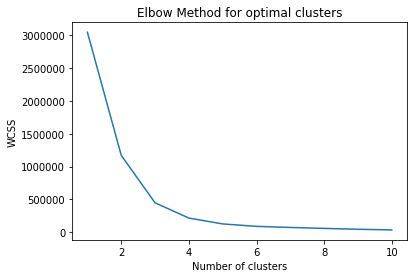

In [3]:
# use Elbow method to select cluster, k. Assume k is in the range of 1 to 10.
# reference: reference: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pancancer.iloc[:,:1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


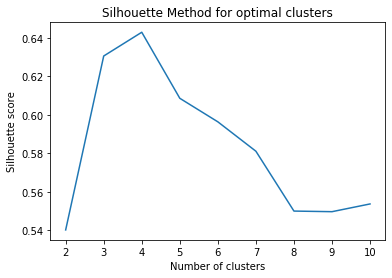

In [4]:
# Silhouette Method
from sklearn.metrics import silhouette_score
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(pancancer.iloc[:,:1])
  labels = kmeans.labels_
  sil.append(silhouette_score(pancancer.iloc[:,:1], labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('Silhouette Method for optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

#### 2.  K-mean algorithms


(a): Using the k-Means algorithm, implement a clustering model. You can use Python (Scikit-learn)

In [5]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(pancancer)
print(y_kmeans)
kmeans.cluster_centers_

[2 0 2 2 1 2 1 2 1 2 1 1 2 1 1 1 0 1 1 2 1 1 0 1 1 0 3 1 1 1 1 1 1 1 2 1 1
 0 1 1 1 2 2 1 1 1 2 3 1 0 1 0 1 2 3 1 1 3 1 1 0 1 1 0 2 3 1 2 1 1 1 1 1 0
 1 0 1 1 2 3 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 2 3 1 2 1 1 1 1 1 0 1 0 3 0 0 2
 1 0 2 1 1 1 1 1 1 0 1 0 1 2 2 2 1 1 1 3 1 3 1 1 1 0 1 1 3 1 2 1 1 0 3 2 1
 0 0 0 0 1 1 0 1 1 2 2 0 2 0 1 1 2 0 3 1 0 1 1 0 1 0 1 1 1 2 1 1 3 1 1 2 2
 2 0 0 1 0 0 1 0 2 0 1 1 1 0 0 1 1 1 1 1 2 1 2 1 0 0 1 2 1 2 1 1 1 0 1 1 0
 1 1 0 1 1 2 1 0 0 2 3 1 1 2 1 3 1 1 1 0 2 2 0 0 1 1 1 3 1 2 3 1 2 1 2 2 2
 1 3 3 0 3 3 2 0 1 1 1 1 1 3 2 1 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 2 1 1 3 0 2 1 1 1 3 1 2 1 3 0 0 2 1 1 1 1 0 3 1 1 1 1 1 1 1 1 2 1 1
 1 0 2 1 1 2 3 1 1 1 0 0 0 1 1 2 0 1 1 1 3 3 0 1 1 1 1 1 3 0 3 1 2 1 1 1 1
 1 3 2 0 2 1 1 2 1 3 1 1 3 3 2 1 1 3 1 1 2 1 1 1 0 0 1 0 1 1 3 2 1 0 2 1 1
 1 0 1 1 2 1 2 3 1 0 1 1 0 1 1 1 1 0 2 1 2 1 1 1 3 1 2 0 1 1 1 1 1 0 1 1 2
 3 1 1 0 2 1 2 1 1 1 1 1 0 1 1 1 1 0 0 1 3 2 3 1 1 1 1 2 1 3 0 0 1 2 2 1 2
 0 1 2 1 0 2 0 1 1 3 0 1 

array([[ 50.90244086,  12.39849   , -81.64418427,  -3.60637383,
         21.61183498, -18.56111874,   2.11141747,  -3.06067454,
          4.1209878 ],
       [ -5.48399299, -41.93443593,  17.01825524,   4.74626231,
         -0.89821561,   4.73112673,   1.29164077,  -0.35167792,
         -1.25930495],
       [-97.35934163,  73.28172231,  -3.95172251,  -4.87034015,
          4.73741599,   5.98310104,  -5.45591957,   3.93768864,
          0.34929305],
       [111.31633247,  92.0068112 ,  56.4083339 , -12.45541451,
        -42.4356478 ,  -4.34662201,  -1.71751235,   0.65611024,
         -0.7827731 ]])

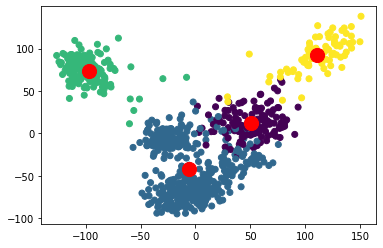

In [6]:
# check out the k-means clustering visualization in terms of feature1 and feature2
plt.scatter(pancancer.iloc[:,0],pancancer.iloc[:,1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)

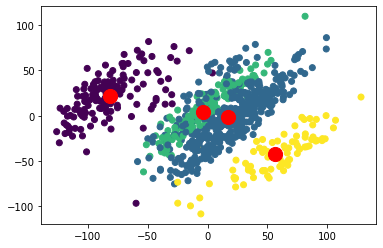

In [7]:
# check the k-means clustering visualization in terms of feature3 and feature5
plt.scatter(pancancer.iloc[:,2],pancancer.iloc[:,4], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 4], c='red', s=200)

(b): Train the clustering model on several reasonable values of k, taking into account your visual inspection from 1b. Plot the Bayesian information criterion (BIC) and Akaike information criterion (AIC) for each value of k:

Note: AIC and BIC are methods for scoring and selecting a model.

In [8]:
# reference: https://stackoverflow.com/questions/45072812/calculate-akaike-information-criteria-aic-by-hand-in-python
from sklearn.mixture import GaussianMixture
score_a = []
score_b = []
np.random.seed(5)

for k in range(2,11):
    model = GaussianMixture(n_components=k, init_params='kmeans')
    model.fit(pancancer)
    score_a.append(model.aic(pancancer))
    score_b.append(model.bic(pancancer))

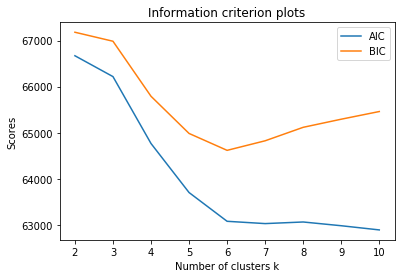

In [9]:
plt.plot(range(2,11),score_a, label='AIC')
plt.plot(range(2,11),score_b, label='BIC')
plt.xlabel('Number of clusters k')
plt.ylabel('Scores')
plt.title('Information criterion plots')
plt.legend()
plt.show()

For both AIC and BIC, given a set of candidate models for the data, the preferred model is the one with the minimum AIC(BIC) value. In other words, the higher the number, the better the fit. 

From BIC curve, the optimal cluster k = 6. From AIC curve, it seems like the higher k the better fit. But the simulated scores vary as the loop rerun, and half of the times k = 4 is the elbow locator with a solid minimum score for both AIC and BIC curve (without setting random seed). So from the above plot we could say that the optimal k = 4, it then matches my visual inspection and results from the Elbow and Silhouette methods. However, from the above plot where optimal k = 6, it is slightly different from the previous result.


### 2. K-Nearest Neighbor Classification:

In [10]:
test_iris = pd.read_csv('test.csv', header=None)
test_iris.columns = ['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth','Species']

train_iris = pd.read_csv('train.csv', header=None)
train_iris.columns = ['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth','Species']

val_iris = pd.read_csv('val.csv', header=None)
val_iris.columns = ['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth','Species']

test_iris.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth,Species
0,0.899641,0.329611,-0.314771,0.101123,Iris-versicolor
1,-2.405514,0.195917,0.270717,0.173785,Iris-setosa
2,-2.587346,0.520474,0.219572,-0.069082,Iris-setosa
3,-2.507917,-0.139056,-0.247116,0.035384,Iris-setosa
4,1.661935,0.242038,0.242815,0.119448,Iris-virginica


In [11]:
train_iris.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2     Iris-versicolor
3     Iris-versicolor
4     Iris-versicolor
           ...       
85     Iris-virginica
86        Iris-setosa
87        Iris-setosa
88        Iris-setosa
89     Iris-virginica
Name: Species, Length: 90, dtype: object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    knn.fit(train_iris.iloc[:,:4], train_iris.iloc[:,4])
    acc = knn.score(val_iris.iloc[:,:4],val_iris.iloc[:,4])
    accuracy.append(acc)

In [13]:
accuracy = pd.DataFrame(accuracy)
k = list(range(1,26))
accuracy['k']= k
accuracy.columns = ['Accuracy', 'k']
print(accuracy)

    Accuracy   k
0   0.933333   1
1   0.900000   2
2   0.966667   3
3   0.966667   4
4   0.966667   5
5   0.933333   6
6   0.966667   7
7   0.966667   8
8   0.966667   9
9   0.933333  10
10  1.000000  11
11  0.966667  12
12  0.966667  13
13  0.966667  14
14  1.000000  15
15  0.933333  16
16  0.933333  17
17  0.900000  18
18  0.900000  19
19  0.900000  20
20  0.900000  21
21  0.900000  22
22  0.900000  23
23  0.900000  24
24  0.900000  25


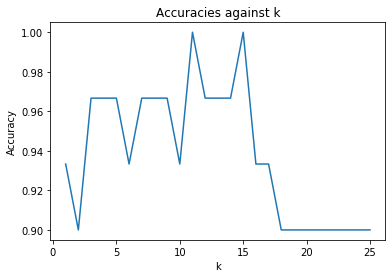

In [14]:
plt.plot(accuracy['k'],accuracy['Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracies against k')
plt.show()

In [15]:
accuracy['Accuracy'].idxmax()

10

In [16]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
knn.fit(train_iris.iloc[:,:4], train_iris.iloc[:,4])
acc = knn.score(test_iris.iloc[:,:4],test_iris.iloc[:,4])
print('When k=11, the Accuracy of the knn model is: ', acc)

When k=11, the Accuracy of the knn model is:  0.9666666666666667


### 3. Decision Trees Classification:

#### 1. Data Imputation and reformat:

In [17]:
test_titanic = pd.read_csv('titanic_test.csv')
train_titanic = pd.read_csv('titanic_train.csv')
val_titanic = pd.read_csv('titanic_val.csv')
test_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,3,male,42,1,1,15.2458,C,0,Master
1,2,male,31,0,0,10.5000,S,0,Mr
2,3,male,20,0,0,7.9250,S,0,Mr
3,2,female,6,0,1,33.0000,S,0,Miss
4,3,female,14,1,0,11.2417,C,0,Miss


In [18]:
test_titanic.dtypes

Pclass         int64
Sex           object
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Has_Cabin      int64
Title         object
dtype: object

From the above results shown, sex and Embarked need to be converted to int. Title includes multiple information.In details, Master is for male who are under 18, Miss is for unmarried female, Mrs refers to married female, and Rare could be a title for special group of people. So, I may add a column for people who are married or unmarried, over 18, etc or under 18 depending on the gender. But the title would have provided enough information so I'll leave it there, instead of adding new columns based on Title. 

After the above all, we need to rescale the dataset since they have different scales. Typically, bounding predictor between 0 and 1 can be helpful for getting model estimation algorithms to converge

In [19]:
train_titanic['Title'].describe() # it has all 5 titles

count     498
unique      5
top        Mr
freq      295
Name: Title, dtype: object

In [20]:
val_titanic['Title'].describe() # it has 4 titles without Rare

count     125
unique      4
top        Mr
freq       73
Name: Title, dtype: object

In [21]:
test_titanic['Title'].describe() # it has 5 titles


count     268
unique      5
top        Mr
freq      149
Name: Title, dtype: object

In [22]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()


# for train dataset
sex_code=le.fit_transform(train_titanic['Sex'])
train_titanic['Sex_code'] = sex_code # female = 0, male = 1

embarked_code=le.fit_transform(train_titanic['Embarked'])
train_titanic['Embarked_code'] = embarked_code # C = 0, Q = 1, S = 2

title_code=le.fit_transform(train_titanic['Title'])
train_titanic['Title_code'] = title_code # Master = 0, Miss = 1, Mr = 2, Mrs = 3, Rare=4

train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,Sex_code,Embarked_code,Title_code
0,1,1,female,24,0,0,69.3000,C,1,Mrs,0,0,3
1,0,3,female,3,3,1,21.0750,S,0,Miss,0,2,1
2,1,3,female,16,0,0,7.7333,Q,0,Miss,0,1,1
3,1,3,male,32,0,0,56.4958,S,0,Mr,1,2,2
4,0,3,male,22,0,0,7.1250,S,0,Mr,1,2,2


In [23]:
train_titanic.dtypes

Survived           int64
Pclass             int64
Sex               object
Age                int64
SibSp              int64
Parch              int64
Fare             float64
Embarked          object
Has_Cabin          int64
Title             object
Sex_code           int64
Embarked_code      int64
Title_code         int64
dtype: object

In [24]:
# for val dataset

sex_code=le.fit_transform(val_titanic['Sex'])
val_titanic['Sex_code'] = sex_code

embarked_code=le.fit_transform(val_titanic['Embarked'])
val_titanic['Embarked_code'] = embarked_code

title_code=le.fit_transform(val_titanic['Title'])
val_titanic['Title_code'] = title_code # Master = 0, Miss = 1, Mr = 2, Mrs = 3



In [25]:
# for test dataset

sex_code=le.fit_transform(test_titanic['Sex'])
test_titanic['Sex_code'] = sex_code

embarked_code=le.fit_transform(test_titanic['Embarked'])
test_titanic['Embarked_code'] = embarked_code

title_code=le.fit_transform(test_titanic['Title'])
test_titanic['Title_code'] = title_code # Master = 0, Miss = 1, Mr = 2, Mrs = 3, Rare = 4

#### 2. Decision Trees Classification：
 Implement a binary decision tree model:

In [26]:
# reference: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Implement a binary decision tree model for the training data:
from sklearn.tree import DecisionTreeClassifier

#feature_cols = ['Fare','Has_Cabin','Sex_code','Embarked_code','Title_code']
feature_cols = ['Pclass','Age','SibSp','Parch','Fare','Has_Cabin','Sex_code','Embarked_code','Title_code']
X_train = train_titanic[feature_cols] # Features
y_train = train_titanic.iloc[:,0] # Target label

X_val = val_titanic[feature_cols] # Features
y_val = val_titanic.iloc[:,0] # Target label

X_test = test_titanic[feature_cols] 

# rescale the data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()

X_train = feature_scaler.fit_transform(X_train)
X_val = feature_scaler.transform(X_val)
X_test = feature_scaler.transform(X_test)


In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


Tune the maximum depth of the tree:

In [28]:
accuracy = []

np.random.seed(4)

for i in range(1,11):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    # Model Accuracy, how often is the classifier correct?
    acc = clf.score(X_val, y_val)
    accuracy.append(acc)
    
accuracy = pd.DataFrame(accuracy)
m = list(range(1,11))
accuracy['MaximumDepth']= m
accuracy.columns = ['Accuracy', 'MaximumDepth']
print(accuracy)
accuracy['Accuracy'].idxmax()


   Accuracy  MaximumDepth
0     0.808             1
1     0.792             2
2     0.840             3
3     0.856             4
4     0.848             5
5     0.864             6
6     0.816             7
7     0.856             8
8     0.792             9
9     0.808            10


5

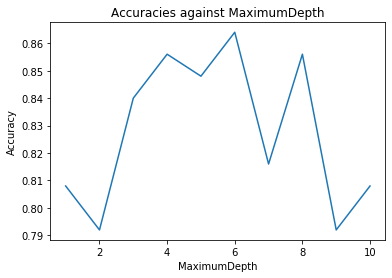

In [29]:
plt.plot(accuracy['MaximumDepth'],accuracy['Accuracy'])
plt.xlabel('MaximumDepth')
plt.ylabel('Accuracy')
plt.title('Accuracies against MaximumDepth')
plt.show()

From the plot above, we can see that the optimal maximum depth is 6.

In [30]:
alldata = train_titanic.append(val_titanic)

np.random.seed(4)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train Decision Tree Classifer
clf = clf.fit(alldata[feature_cols],alldata['Survived'])

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,1
1,1
2,1
3,0
4,0


In [42]:
y_pred.to_csv('f0040sj_dt_prediction.csv',header=None, index=False)

### 4. Random Forest Classification:
#### Initialize a random forest classifier:

In [57]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a random forest classifier
clf=RandomForestClassifier(n_estimators=100, random_state=0) # n_estomators is the number of trees, max_depth is the maximum depth of the tree

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Tune the maximum depth of the tree:

In [58]:
# reference: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=0, max_depth = 5)

from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator=clf, X=alldata[feature_cols],y=alldata['Survived'], cv=10) # cv for the number of folds


In [59]:
# Grid Search. The algorithm will check 100 combinations from n_estimators and max_depth (10 x 10 = 100)
from sklearn.model_selection import GridSearchCV 

grid_param = {
    'n_estimators': [100,300,500,700,900, 1000, 1300, 1500],
    'max_depth': list(range(1,11))
}

gd_sr = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(alldata[feature_cols], alldata['Survived'])

# print the highest accuracy is achieved
best_parameters = gd_sr.best_params_
print(best_parameters)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8, 'n_estimators': 1000}


In [60]:
# print the accuracy according to the optimal chosen of n_parameters and max_depth
best_result = gd_sr.best_score_
print(best_result)

0.8459069020866774


The above results indicate that the optimal number of trees is 1000, and the optimal maximum depth of the tree is 8. Using the optimal two parameters, the accuracy of the model is 0.8459069020866774. 


#### Report and interpret the feature importance of each features by your ran- dom forest model:

#### Predict the survivals on testing data using the classifier with the opti- mum parameters from 2b:

In [61]:
clf=RandomForestClassifier(n_estimators=1000, max_depth = 8)
clf.fit(alldata[feature_cols], alldata['Survived'])
y_pred1 = clf.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [62]:
y_pred1 = pd.DataFrame(y_pred1)
y_pred1.head()

,0
0,1
1,1
2,1
3,1
4,1


In [63]:
y_pred1.to_csv('f0040sj_rf_prediction.csv',header=None, index=False)

### 5. SVM classification:

#### Build SVM classifiers:

In [32]:
from sklearn import svm

# Linear Kernel
clf1 = svm.SVC(kernel='linear') 

#Train the model using the training sets
clf1.fit(X_train, y_train)

# evaluate the performance:
acc1 = clf1.score(X_val, y_val)
print(acc1)

0.808


In [33]:
#polynomial kernel, with d = 2
clf2 = svm.SVC(kernel='poly', degree=2,gamma='auto') 

#Train the model using the training sets
clf2.fit(X_train, y_train)

# evaluate the performance:
acc2 = clf2.score(X_val, y_val)
print(acc2)

0.824


In [34]:
# Radial Basis Function Kernel
clf3 = svm.SVC(kernel='rbf', random_state=0, gamma=.05, C=1)

clf3.fit(X_train, y_train)

# evaluate the performance:
acc3 = clf3.score(X_val, y_val)
print(acc3)

0.848


From the above results, we can se ethat the radial basis function kernel has the most accurate result, but as the model is more accurate, it could be less generalizable. To avoid overfitting due to the use of training set, we could use cross validation to evaluate them again. 

In [35]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf1, alldata[feature_cols], alldata['Survived'], cv=5)
print(scores1)

[0.75396825 0.744      0.80645161 0.82258065 0.7983871 ]


In [36]:
scores2 = cross_val_score(clf2, alldata[feature_cols], alldata['Survived'], cv=5)
print(scores2)

[0.78571429 0.784      0.82258065 0.87903226 0.83064516]


In [38]:
scores3 = cross_val_score(clf3, alldata[feature_cols], alldata['Survived'], cv=5)
print(scores3)

[0.63492063 0.736      0.67741935 0.72580645 0.69354839]


This time, after applying cross validation, we can see that generally radial basis function is the least accurate model, while polynomial is the most accurate model.

Note that the linear, polynomial and RBF or Gaussian kernel are simply different in case of making the hyperplane decision boundary between the classes. Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It may be because that the training feature data are non-linear and space over polynomials, so the polynomial svm would be the best model. 

In [39]:
y_pred2 = clf2.predict(X_test)
y_pred2

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [40]:
y_pred2 = pd.DataFrame(y_pred2)

In [41]:
y_pred2.to_csv('f0040sj_svm_prediction.csv',header=None, index=False)